In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
from matplotlib.image import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input,Conv2D, MaxPool2D, Dropout, Flatten, Dense # Import layers that will be used in modeling

import warnings
warnings.filterwarnings("ignore")

In [2]:
img_width, img_height = 100, 100      


train_data_dir = 'D:\\chest_xray\\train'
test_data_dir =  'D:\\chest_xray\\test'



# 2.4 Data folder containing all validation images

validation_data_dir = 'D:\\chest_xray\\val'


# Some hyperparameters

# Batch size to train at one go:
batch_size = 16          

epochs = 5                  


# For test data, what should be batch size
test_batch_size = 30   

# 
input_shape = (img_width, img_height, 3)


# Model Building

In [3]:
model = Sequential()

In [4]:
# Add Input layer
model.add(Input(shape = input_shape ))

In [5]:
model.add(Conv2D(
             filters=32,                # For every filter there is set of weights
                                       # For each filter, one bias. So total bias = 32
            kernel_size=(3, 3),        # For each filter there are 3*3=9 kernel_weights
           strides = (2,2),           # So output shape will be 148 X 148 (W-F+1). Conv layer kitna displace hogi(2 se displace both r & c)                                      # Default strides is 1 only
           #input_shape=input_shape,   # (150,150,3)
             padding='valid',           # 'valid' => No padding. This is default.
             activation='relu'
             )
         )

In [6]:
model.add(MaxPool2D())

In [7]:
model.add(Conv2D(
             filters=32,                # For every filter there is set of weights
                                        # For each filter, one bias. So total bias = 32
             kernel_size=(3, 3),        # For each filter there are 3*3=9 kernel_weights
             activation='relu'
             )
         )

In [8]:
model.add(MaxPool2D())

In [9]:
model.add(Conv2D(
             filters=64,               
                                       
             kernel_size=(3, 3),       
             activation='selu'
             )
         )

In [10]:
model.add(Flatten())

In [11]:
model.add(Dense(100,activation = 'tanh'))

In [12]:
model.add(Dropout(rate=0.2))

In [13]:
model.add(Dense(164, activation='relu'))

In [14]:
model.add(Dropout(rate=0.5))

In [15]:
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 49, 49, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 5184)              0

In [17]:
model.compile(
              loss='binary_crossentropy',  
              optimizer='adam',        
              metrics=['accuracy'])        


# Image generator

In [18]:

tr_dtgen = ImageDataGenerator(

                              rescale=1. / 255,    
                              shear_range=0.1,       
                              zoom_range=0.2,
                              horizontal_flip=True,
                              )

In [19]:
train_generator = tr_dtgen.flow_from_directory(
                                               train_data_dir,       
                                               target_size=(img_width, img_height), 
                                               batch_size=batch_size, 
                                               class_mode='binary'  
                                                )

Found 5216 images belonging to 2 classes.


In [20]:
val_dtgen = ImageDataGenerator(rescale=1. / 255)

In [21]:
# 5.4.1 validation data
validation_generator = val_dtgen.flow_from_directory(
                                                     validation_data_dir,
                                                     target_size=(img_width, img_height),  
                                                     batch_size=batch_size,  
                                                     class_mode='binary'  
                                                     )

Found 16 images belonging to 2 classes.


# Model fitting

In [22]:
history = model.fit_generator(
                             
                              generator = train_generator,
                              
                              # No of epochs
                              epochs=1,
                              # Get validation data from validation generator
                              validation_data=validation_generator,
                              verbose = 1
                              
                              )


326/326 [==============================] - 48s 143ms/step - loss: 0.3206 - accuracy: 0.8629 - val_loss: 0.3142 - val_accuracy: 0.8125


In [27]:
pred = model.predict(validation_generator, steps = 2)


pred[:5]


2/2 [==============================] - 0s 21ms/step


array([[0.9535968 ],
       [0.99499613],
       [0.02333364],
       [0.5489725 ],
       [0.24998768]], dtype=float32)

In [28]:
test_dtgen = ImageDataGenerator(rescale=1. / 255)

# Test data

test_generator = test_dtgen.flow_from_directory(
                                                test_data_dir,
                                                # Resize images
                                                target_size=(img_width, img_height),
                                                # batch size to augment at a time
                                                batch_size=batch_size,
                                                # Return 1D array of class labels
                                                class_mode='binary'
                                                )
     

Found 624 images belonging to 2 classes.


In [29]:
# Get iterator)
im = test_generator    # Get iterator
images = next(im)      # Get images
images[0].shape

(16, 100, 100, 3)

1/1 [==============================] - 0s 61ms/step


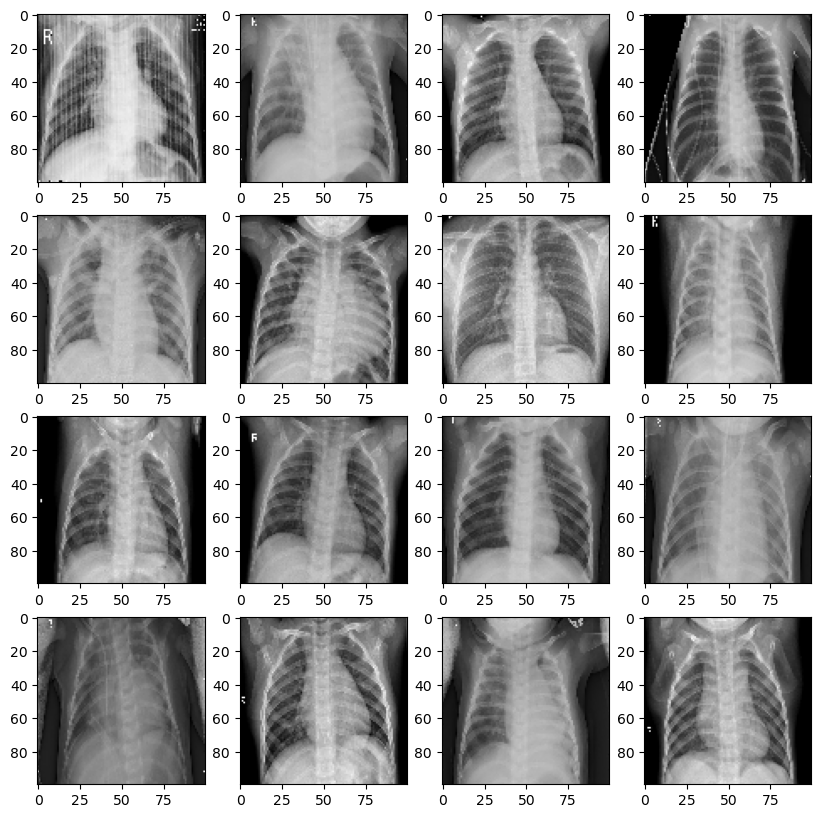

[[0.78227663]
 [0.98438203]
 [0.12253775]
 [0.35154995]
 [0.86625844]
 [0.7767017 ]
 [0.08275667]
 [0.9803382 ]
 [0.11993481]
 [0.20929717]
 [0.3062485 ]
 [0.98801553]
 [0.99692357]
 [0.07209879]
 [0.9942087 ]
 [0.16455922]]


In [26]:
# Make predictions
results = model.predict(images[0])

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.figure(figsize= (10,10))
for i in range(results.shape[0]):
    plt.subplot(4,4,i+1)
    _=imshow(images[0][i]) ;

plt.show() ;
# Predicted labels
print(results)        
                     